# Analysis

This notebook contains execution analysis from results stored in `database.csv`.

## Packages

Open a terminal an run:
```bash
pip install matplotlib
pip install numpy
pip install os
pip install pandas
```

In [13]:
from matplotlib.ticker import PercentFormatter

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

## Initialization

In [14]:
TOTAL_BRAM_18K = 288
TOTAL_CSP48E = 384
TOTAL_FF = 14104
TOTAL_LUT = 11708

In [15]:
database = pd.read_csv(os.path.join(os.getcwd(), 'output', 'simulation_data.csv'))


database['execution_time'] = database['ap_clk_estimated'] * database['latency_max']
database['% BRAM_18K'] = database['BRAM_18K'] / TOTAL_BRAM_18K
database['% CSP48E'] = database['CSP48E'] / TOTAL_CSP48E
database['% FF'] = database['FF'] / TOTAL_FF
database['% LUT'] = database['LUT'] / TOTAL_LUT

print(database.head())

database.to_csv(os.path.join(os.getcwd(), 'output', 'simulation_data_treated.csv'), index=False)

   algorithm  optimization  matrix_size matrix_datatype  ap_clk_estimated  \
0          0             0            8             int              8.51   
1          0             0           16             int              8.51   
2          0             0           32             int              8.51   
3          0             0           64             int              8.51   
4          0             0          128             int              8.51   

   latency_max  BRAM_18K  CSP48E   FF  LUT  execution_time  % BRAM_18K  \
0         2564         3       3  379  732        21819.64    0.010417   
1        18308         3       3  402  748       155801.08    0.010417   
2       138500         6       3  425  736      1178635.00    0.020833   
3      1077764        24       3  448  778      9171771.64    0.083333   
4      8504324        96       3  471  820     72371797.24    0.333333   

   % CSP48E      % FF     % LUT  
0  0.007812  0.026872  0.062521  
1  0.007812  0.028503  0

## Algorithm Resources

Plot algorithms resources usage.

### Hardware Usage

### by Optimization

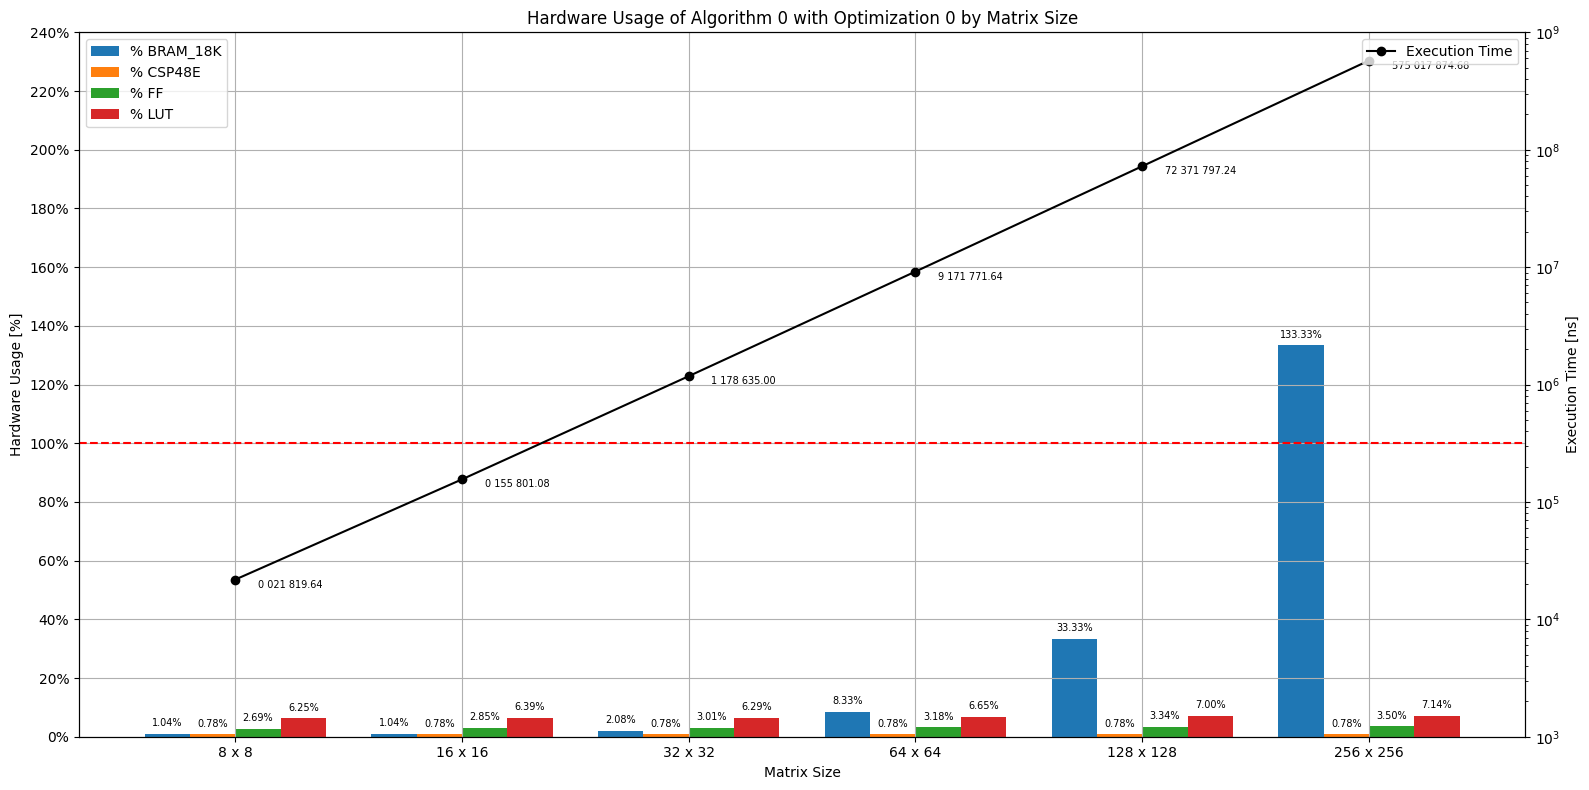

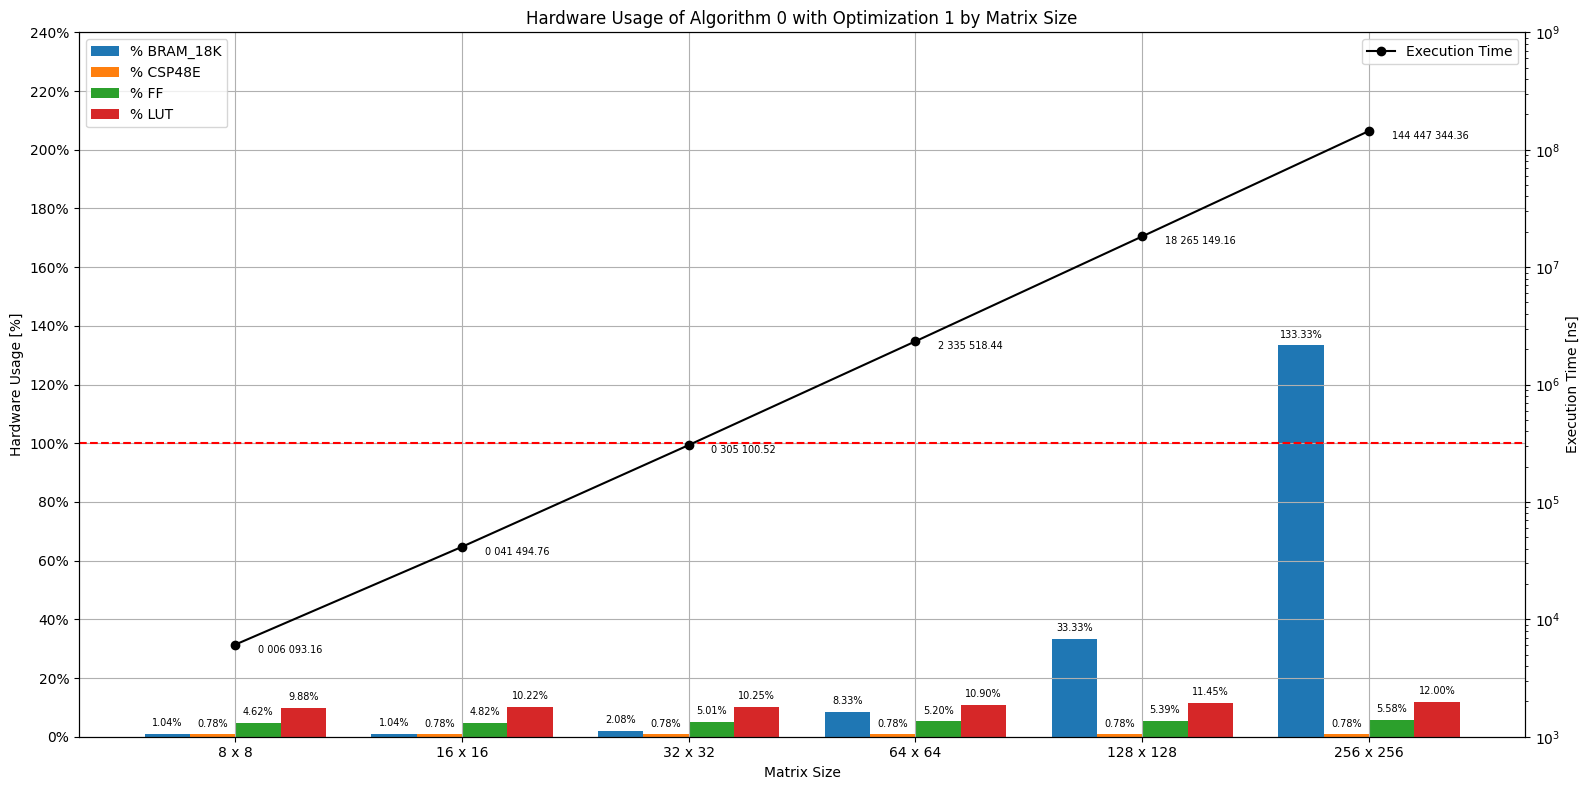

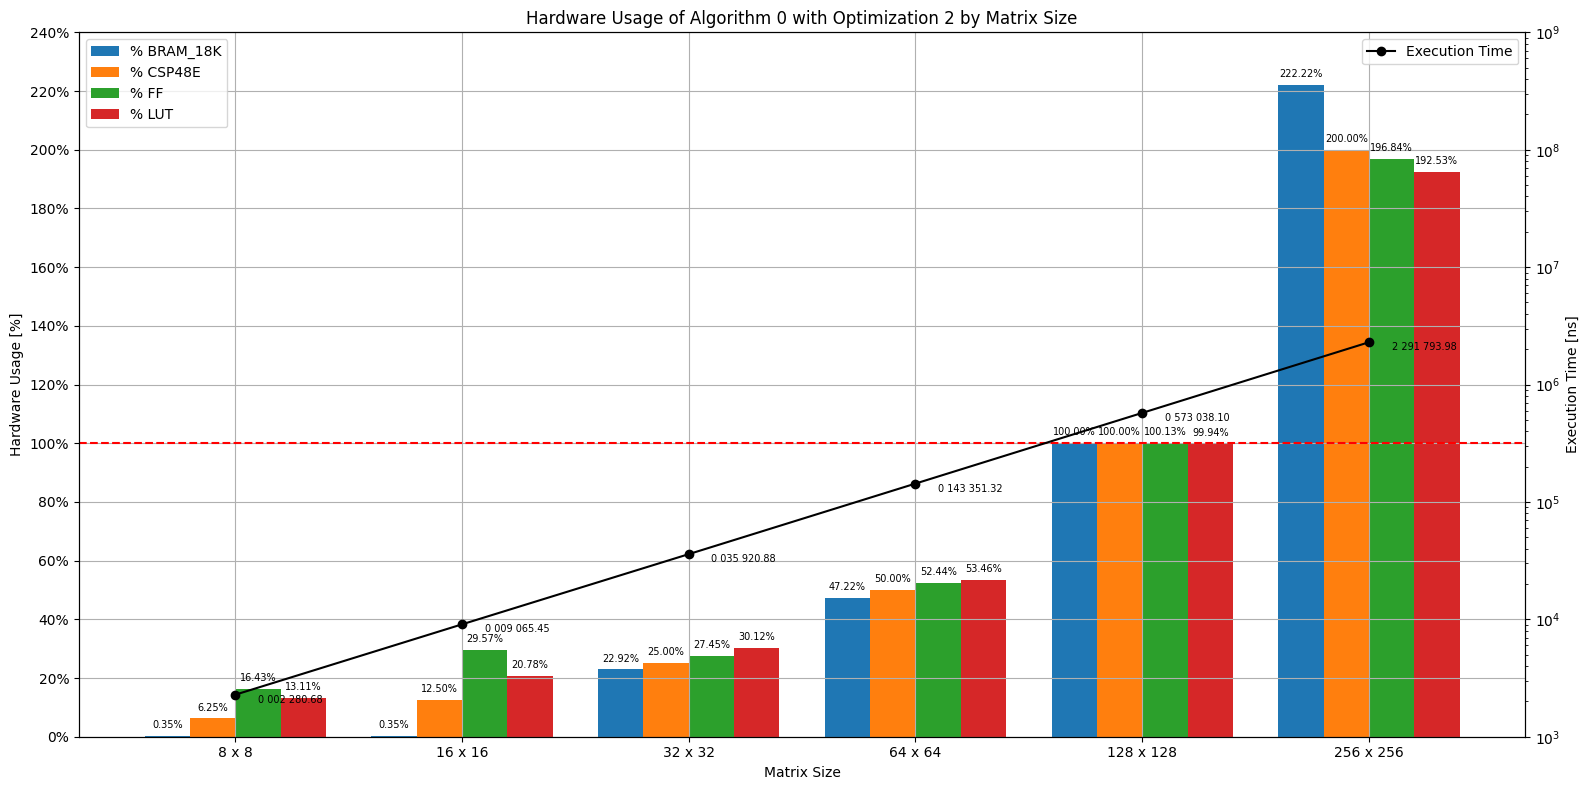

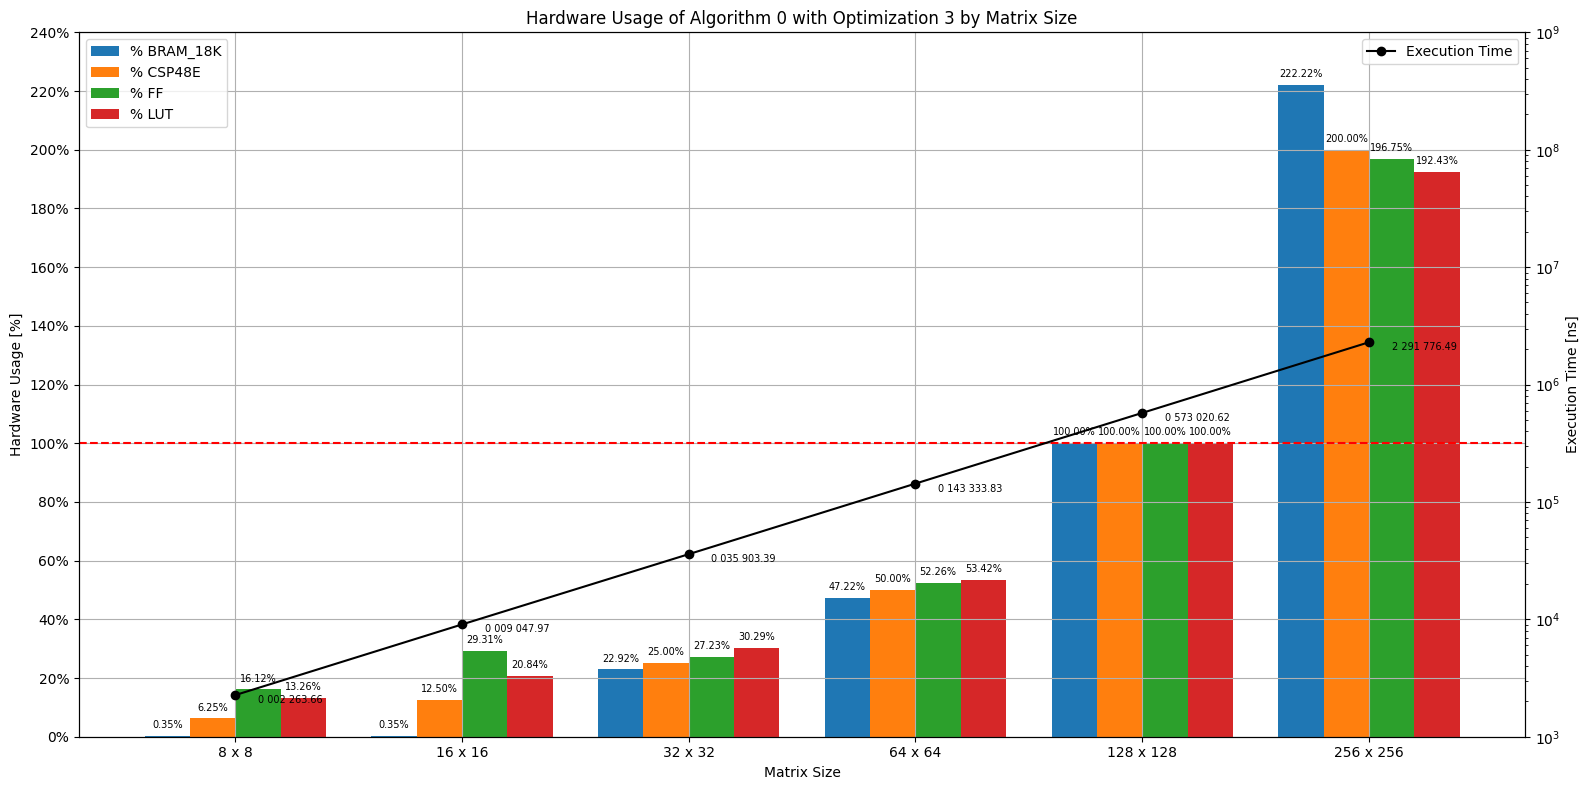

In [24]:
def plot_hardware_usage_optimization(algorithm: int = 0, optimization: int = 0, show: bool = True) -> None:
    """
    Plot hardware usage for an algorithm optimization.
    """
    hardware_measures = ['% BRAM_18K', '% CSP48E', '% FF', '% LUT']

    # filter database
    db = database.query(f'algorithm == {algorithm} & optimization == {optimization}')

    # local variables
    matrix_sizes = db['matrix_size']
    execution_times = db['execution_time']

    bar_width = 0.2
    x_pos = np.arange(len(matrix_sizes))
    x_ticks = [f'{matrix_size} x {matrix_size}' for matrix_size in matrix_sizes]

    # build bar plot
    fig, ax1 = plt.subplots(figsize=(16, 8))
    for i, hardware_measure in enumerate(hardware_measures):
        algorithm_measures = db[hardware_measure].values

        ax1.bar(x_pos + i * bar_width, algorithm_measures, bar_width, label=hardware_measure)

        # add values on each bars
        for j, measure in enumerate(algorithm_measures):
            ax1.text(x_pos[j] + i * bar_width, measure + 0.02, f'{measure:.2%}', ha='center', va='bottom', fontsize=7)

    ax1.set_xlabel('Matrix Size')
    ax1.set_xticks(x_pos + (bar_width * (len(hardware_measures) - 1)) / 2, x_ticks)

    ax1.set_ylabel('Hardware Usage [%]')
    ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
    ax1.yaxis.set_major_formatter(PercentFormatter(1))  # Normalized values are in percentage

    ax1.axhline(1, color='red', linestyle='--')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(x_pos + 1.5 * bar_width, execution_times, color='black', marker='o', label='Execution Time')

    for k, execution_time in enumerate(execution_times):
            ax2.text(x_pos[k] + 2 * bar_width, execution_time, f'{execution_time:012,.2f}'.replace(',', ' '), ha='left', va='top', fontsize=7)
    ax2.set_ylabel('Execution Time [ns]')
    ax2.set_yscale('log', base=10)
    ax2.set_ylim(int(1e3), int(1e9))

    ax2.grid(False)
    ax2.legend(loc='upper right')

    plt.title(f'Hardware Usage of Algorithm {algorithm} with Optimization {optimization} by Matrix Size')
    plt.tight_layout()
    plt.savefig(os.path.join(os.getcwd(), 'output', f'hardware_usage_matrix_size_{algorithm}_{optimization}.png'), dpi=300)

    if show:
        plt.show()


for algorithm in database['algorithm'].unique():
    for optimization in database['optimization'].unique():
        plot_hardware_usage_optimization(algorithm, optimization, show=False)

### by Matrix Size

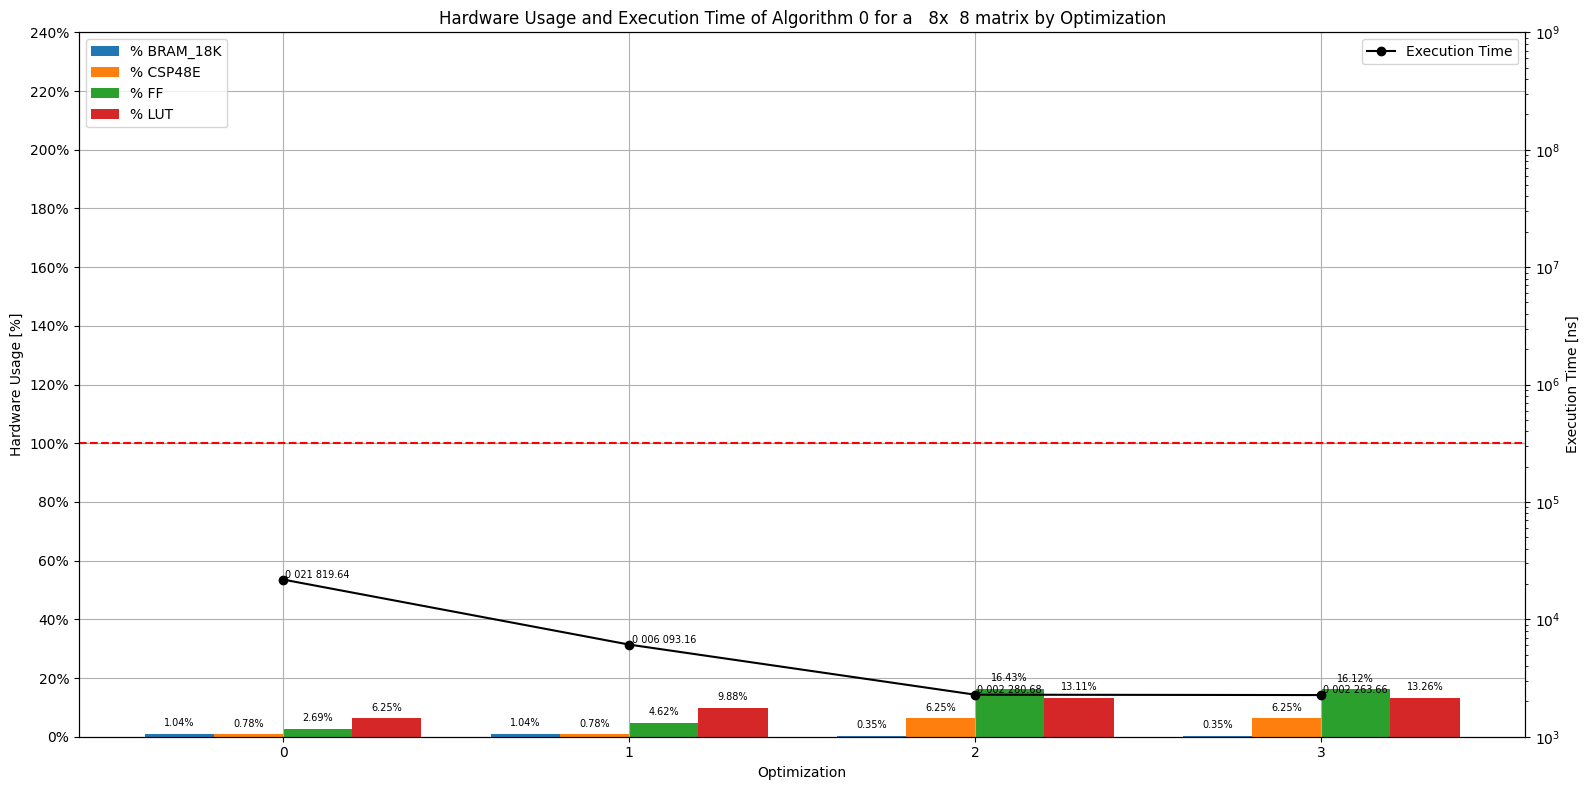

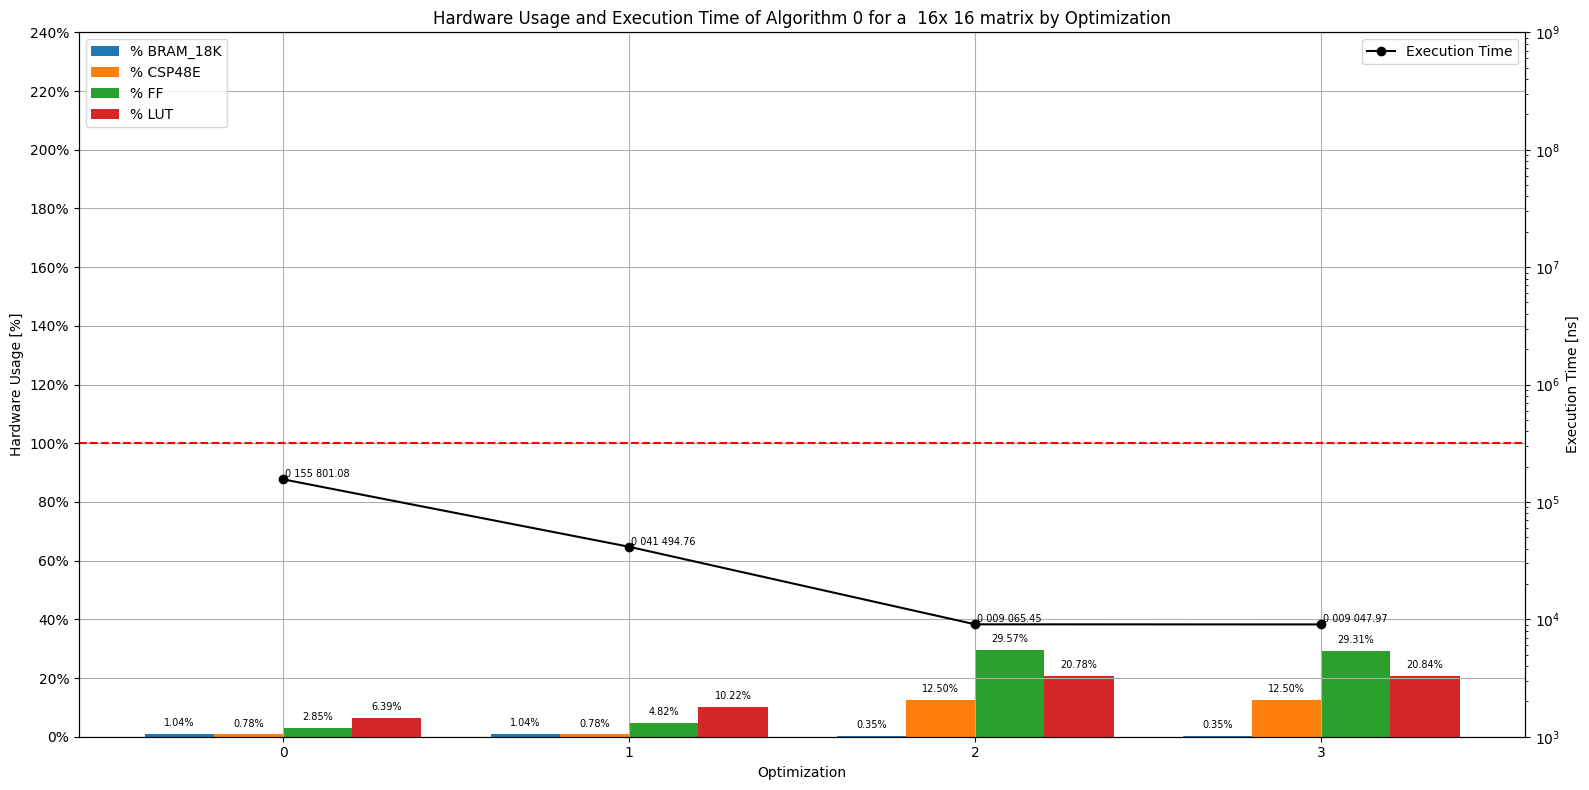

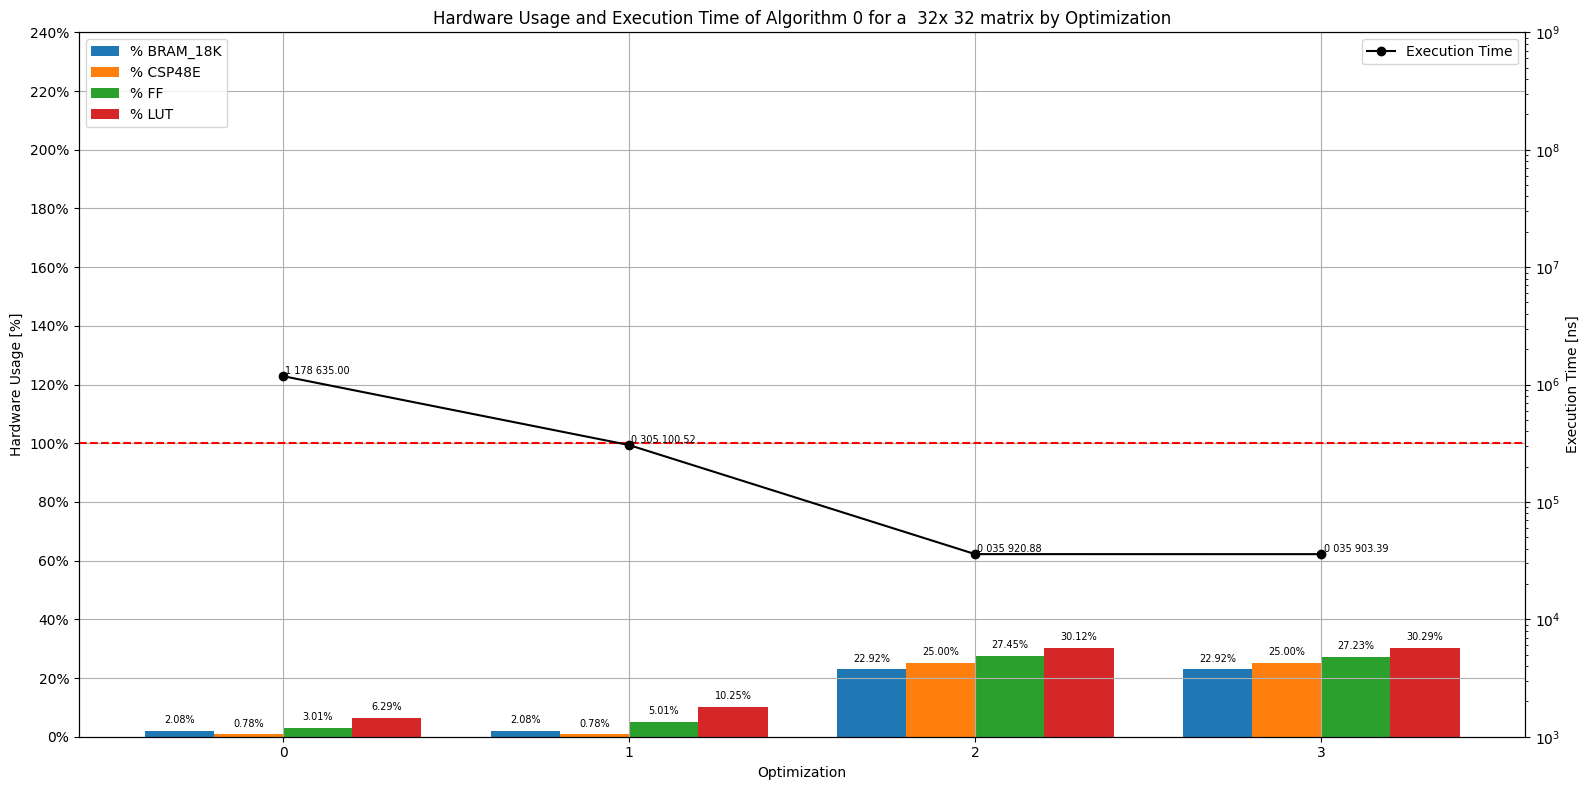

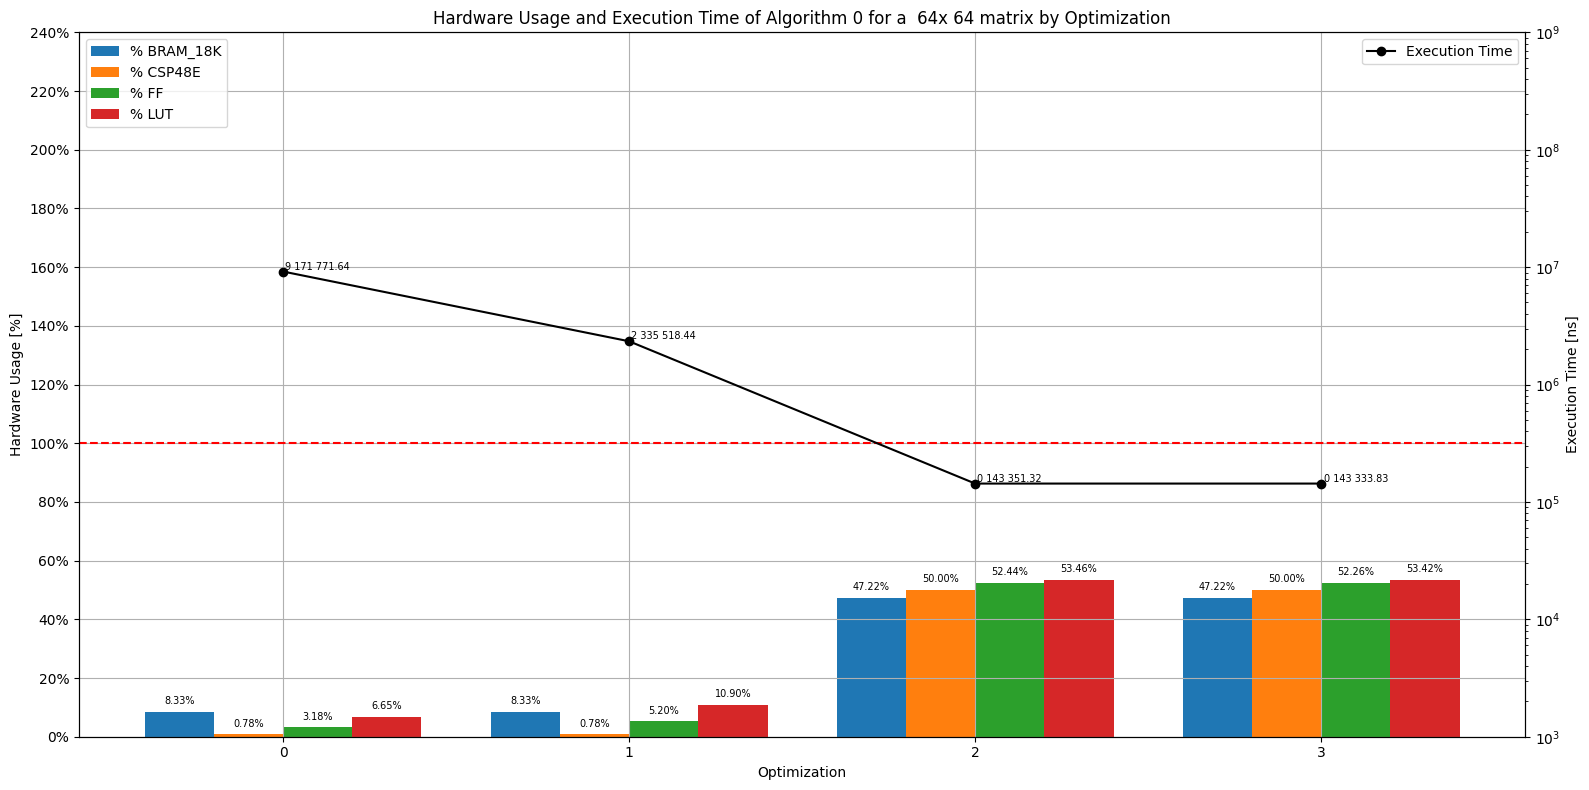

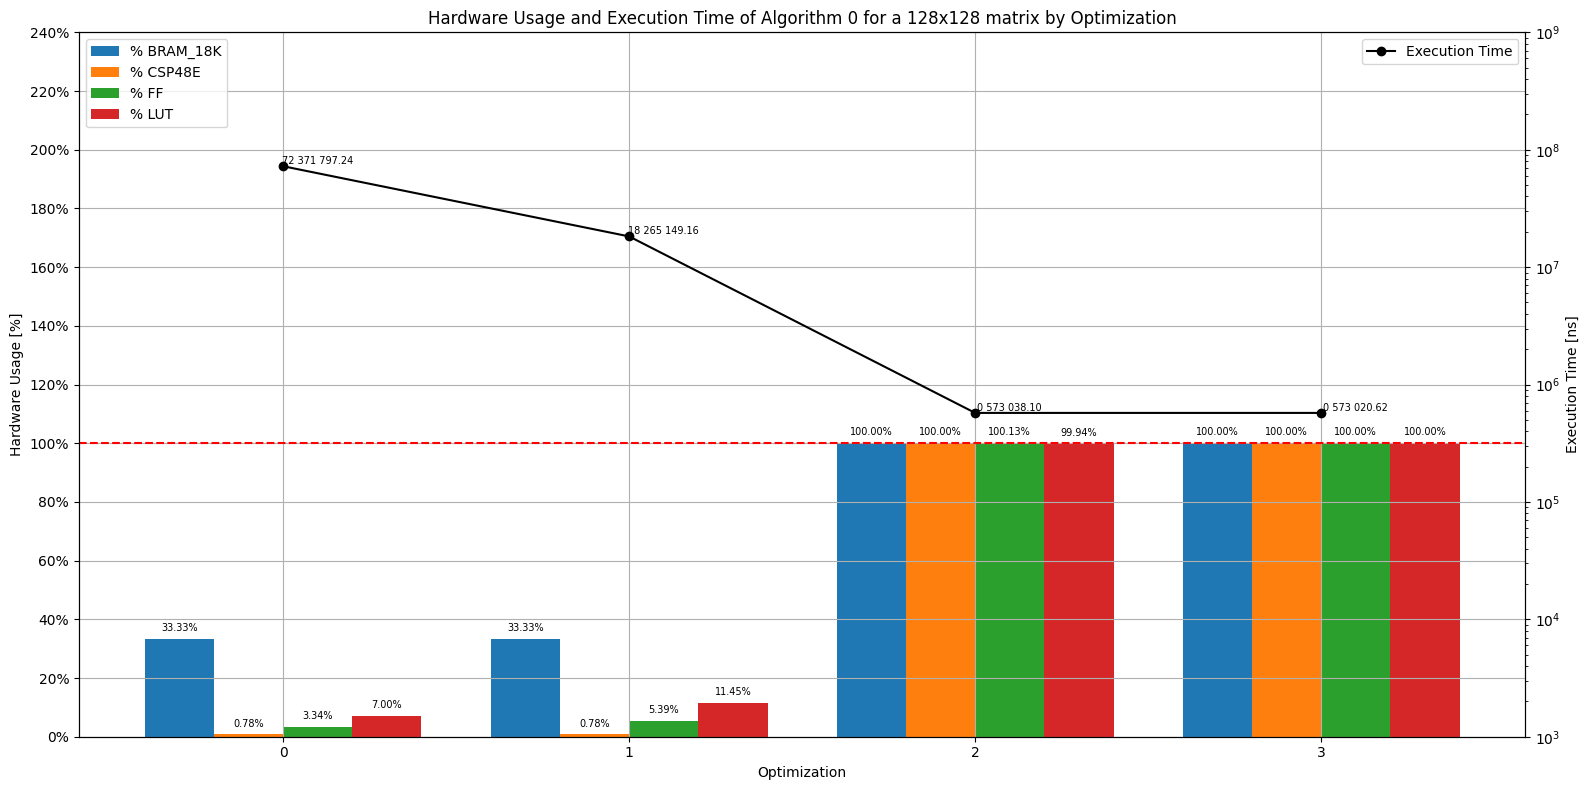

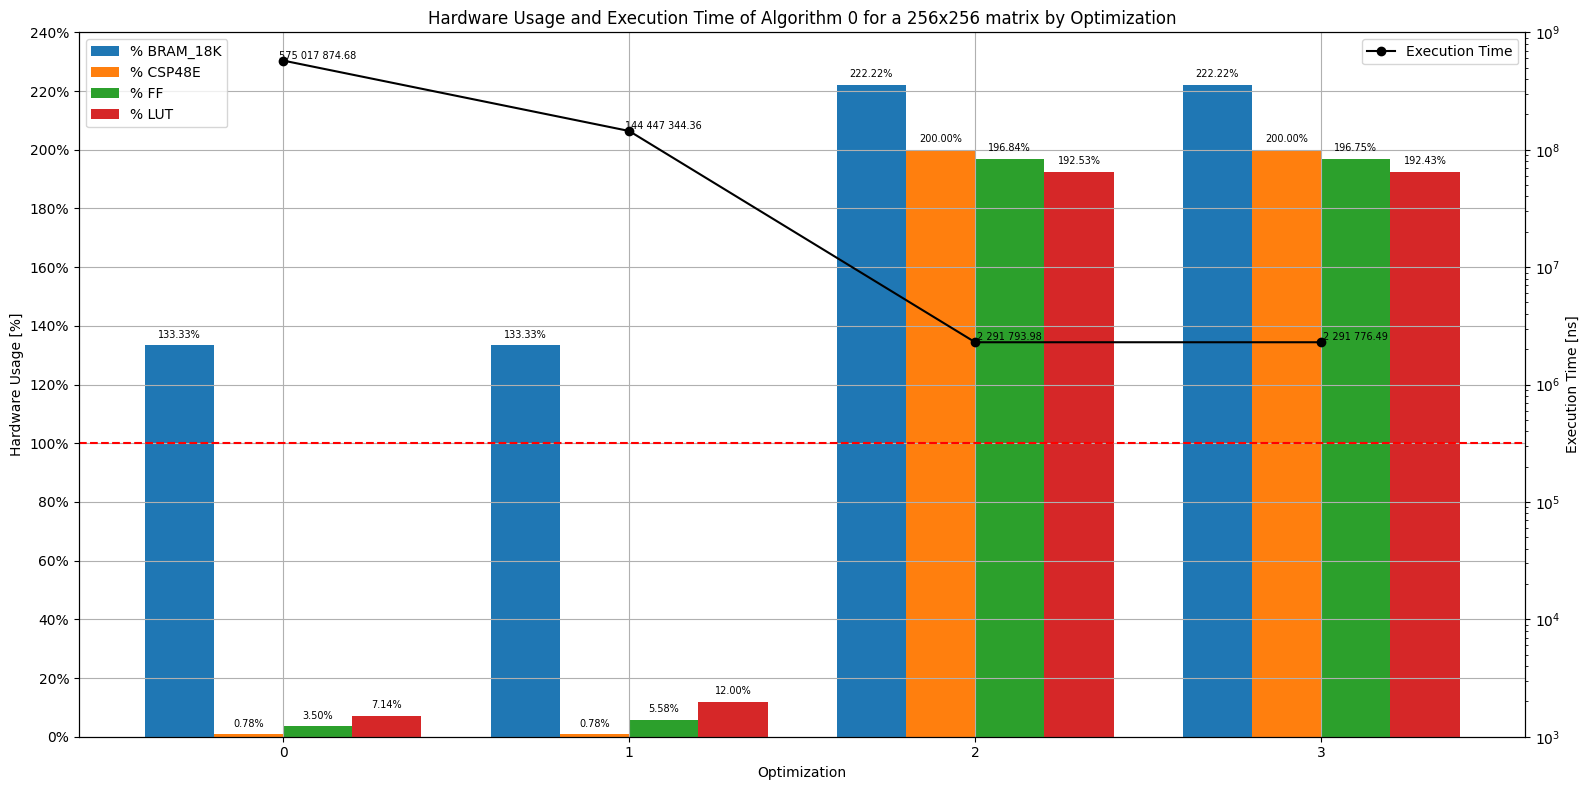

In [20]:
def plot_hardware_usage_matrix_size(algorithm: int = 0, matrix_size: int = 8, show: bool = True) -> None:
    """
    Plot hardware usage for an algorithm by optimization.
    """
    hardware_measures = ['% BRAM_18K', '% CSP48E', '% FF', '% LUT']

    # filter database
    db = database.query(f'matrix_size == {matrix_size}')

    # local variables
    optimizations = db['optimization']
    execution_times = db['execution_time']

    bar_width = 0.2
    x_pos = np.arange(len(optimizations))
    x_ticks = [f'{algorithm}' for algorithm in optimizations]

    # build bar plot
    fig, ax1 = plt.subplots(figsize=(16, 8))
    for i, hardware_measure in enumerate(hardware_measures):
        matrix_size_measures = db[hardware_measure].values

        ax1.bar(x_pos + i * bar_width, matrix_size_measures, bar_width, label=hardware_measure)

        # add values on each bars
        for j, measure in enumerate(matrix_size_measures):
            ax1.text(x_pos[j] + i * bar_width, measure + 0.02, f'{measure:.2%}', ha='center', va='bottom', fontsize=7)

    ax1.set_xlabel('Optimization')
    ax1.set_xticks(x_pos + (bar_width * (len(hardware_measures) - 1)) / 2, x_ticks)

    ax1.set_ylabel('Hardware Usage [%]')
    ax1.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4])
    ax1.yaxis.set_major_formatter(PercentFormatter(1))  # Normalized values are in percentage

    ax1.axhline(1, color='red', linestyle='--')
    ax1.grid(True)
    ax1.legend(loc='upper left')

    ax2 = ax1.twinx()
    ax2.plot(x_pos + 1.5 * bar_width, execution_times, color='black', marker='o', label='Execution Time')

    for k, execution_time in enumerate(execution_times):
            ax2.text(x_pos[k] + 2 * bar_width, execution_time, f'{execution_time:012,.2f}'.replace(',', ' '), ha='center', va='bottom', fontsize=7)
    ax2.set_ylabel('Execution Time [ns]')
    ax2.set_yscale('log', base=10)
    ax2.set_ylim(int(1e3), int(1e9))

    ax2.grid(False)
    ax2.legend(loc='upper right')

    plt.title(f'Hardware Usage and Execution Time of Algorithm {algorithm} for a {matrix_size:3d}x{matrix_size:3d} matrix by Optimization')
    plt.tight_layout()
    plt.savefig(os.path.join(os.getcwd(), 'output', f'hardware_usage_optimization_{algorithm}_{matrix_size}.png'), dpi=300)

    if show:
        plt.show()


for algorithm in database['algorithm'].unique():
    for matrix_size in database['matrix_size'].unique():
        plot_hardware_usage_matrix_size(algorithm, matrix_size, show=False)

### Execution Speed Up

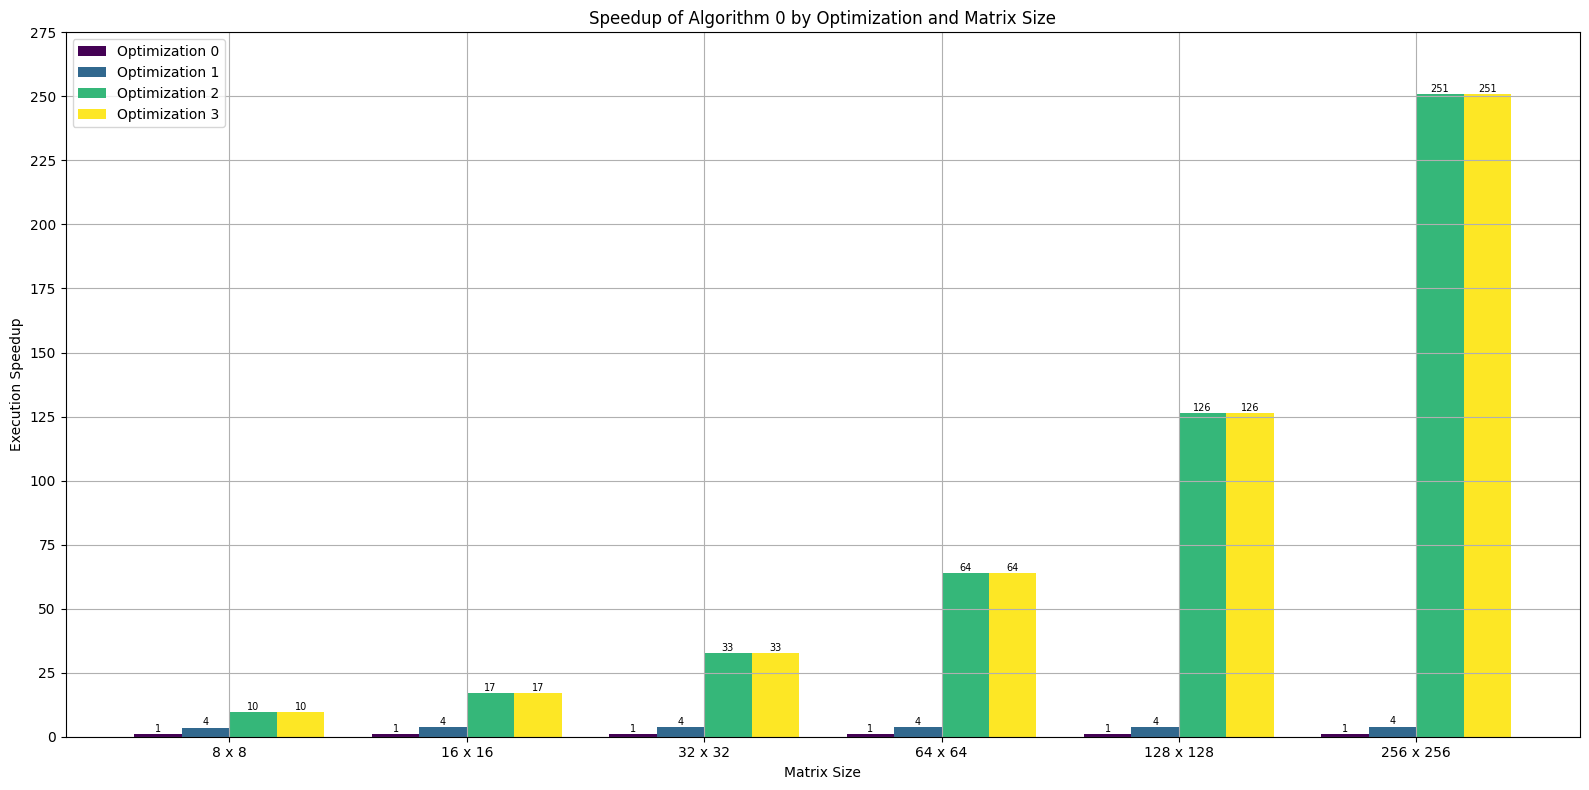

In [18]:
def plot_speed_up(algorithm: int = 0, optimization: int = 0, show: bool = True) -> None:
    """
    Plot speedup of an algorithm optimization vs benchmark.
    """
    # filter database
    db_optimization = database.query(f'algorithm == {algorithm} & optimization == {optimization}')

    # local variables
    optimizations = database['optimization'].unique()
    matrix_sizes = db_optimization['matrix_size'].values

    executions_optimization = db_optimization['execution_time'].values

    bar_width = 0.2
    x_pos = np.arange(len(matrix_sizes))
    x_ticks = [f'{matrix_size} x {matrix_size}' for matrix_size in matrix_sizes]

    # build bar plot
    plt.figure(figsize=(16, 8))
    for i, opt in enumerate(optimizations):
        colors = cm.viridis(np.linspace(0, 1, len(optimizations)))

        df_algorithm = database.query(f'optimization == {opt}')
        execution_algorithm = df_algorithm['execution_time'].values

        speed_ups = executions_optimization / execution_algorithm

        plt.bar(x_pos + i * bar_width, speed_ups, bar_width, label=f'Optimization {opt}', color=colors[i])

        # add values on each bars
        for j, plot_speed_up in enumerate(speed_ups):
            plt.text(x_pos[j] + i * bar_width, plot_speed_up + 0.02, f'{plot_speed_up:.0f}', ha='center', va='bottom', fontsize=7)

    plt.title(f'Speedup of Algorithm {algorithm} by Optimization and Matrix Size')
    plt.xlabel('Matrix Size')
    plt.xticks(x_pos + (bar_width * (len(optimizations) - 1)) / 2, x_ticks)
    plt.yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275])

    plt.ylabel('Execution Speedup')

    plt.legend(loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(os.path.join(os.getcwd(), 'output', f'speedup_matrix_size_{algorithm}_{optimization}.png'), dpi=300)

    if show:
        plt.show()


for algorithm in database['algorithm'].unique():
    plot_speed_up(algorithm, show=False)